<a href="https://colab.research.google.com/github/Azlaan1999/Customer-Churn-Prediction-using-Neural-Networks/blob/main/Customer_Churn_Prediction_using_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [70]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



Importing Dataset

In [71]:
from google.colab import drive
drive.mount('/content/gdrive')
dataset=pd.read_csv("/content/gdrive/MyDrive/Churn_Modelling.csv");dataset

Mounted at /content/gdrive


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [72]:
x=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

creating dummy variables

In [73]:
geography=pd.get_dummies(x["Geography"],drop_first=True)
gender=pd.get_dummies(x["Gender"],drop_first=True)

In [74]:
x=pd.concat([x,geography,gender],axis=1)

In [75]:
x=x.drop(["Geography","Gender"],axis=1)

In [76]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


Splitting data into test and train set

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=0)

Feature Scaling

In [78]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

Importing the keras libraries


In [79]:
import keras
from keras.models import Sequential
from keras.layers import Dense
#from keras.layers import leakyReLU,PReLU,ELU
from keras.layers import Dropout #regularization parameter

In [80]:
# initializing the ANN
classifier= Sequential() #empty neural networks
#Adding the first three hidden layer and weight initializer
classifier.add(Dense(units = 10, kernel_initializer= "he_normal", activation = "relu", input_dim = 11))
classifier.add(Dense(units = 20, kernel_initializer= "he_normal", activation = "relu"))
classifier.add(Dense(units = 15, kernel_initializer= "he_normal", activation = "relu"))
#output layer
classifier.add(Dense(units = 1, kernel_initializer= "glorot_normal", activation = "sigmoid"))

Applying backpropogation(weight updation) by adam optimizer with loss function binary cross entropy since this is a binary classification

In [81]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [82]:
model_history=classifier.fit(x_train, y_train,validation_split=0.33, batch_size= 10, epochs=100)

Epoch 1/100
536/536 [==============================] - 8s 11ms/step - loss: 0.4915 - accuracy: 0.7929 - val_loss: 0.4482 - val_accuracy: 0.8058
Epoch 2/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4230 - accuracy: 0.8173 - val_loss: 0.4148 - val_accuracy: 0.8194
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3932 - accuracy: 0.8313 - val_loss: 0.3878 - val_accuracy: 0.8285
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3690 - accuracy: 0.8461 - val_loss: 0.3736 - val_accuracy: 0.8395
Epoch 5/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3540 - accuracy: 0.8548 - val_loss: 0.3636 - val_accuracy: 0.8440
Epoch 6/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3478 - accuracy: 0.8561 - val_loss: 0.3611 - val_accuracy: 0.8466
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3425 - accuracy: 0.8614 - val_loss: 0.3624 - val_accuracy: 0.849

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


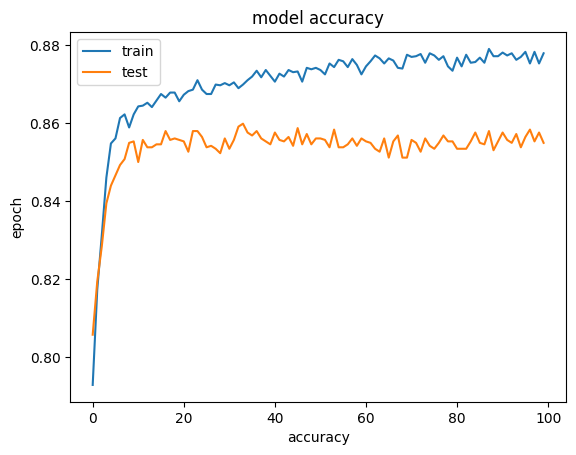

In [83]:
print(model_history.history.keys())
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("model accuracy")
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(["train", "test"], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


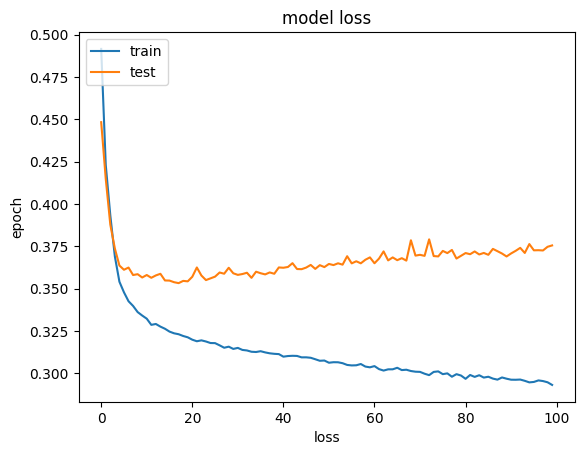

In [84]:
print(model_history.history.keys())
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("model loss")
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(["train", "test"], loc='upper left')
plt.show()

In [85]:
import tensorflow
tensorflow.__version__
!pip install tensorflow==2.8.0

In [86]:
import tensorflow
tensorflow.__version__

'2.8.0'

Generic way to decide the number of hidden layers and neurons

In [87]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization
from keras.activations import relu, sigmoid

In [88]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i == 0:
            model.add(Dense(nodes, input_dim=x_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
    model.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

layers = [[20], [40, 20], [45, 30, 15]]
activation = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activation, batch_size=[128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_result = grid.fit(x_train, y_train)
print(grid_result.best_score_, grid_result.best_params_) # model best result



<ipython-input-88-987198170da6>:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


0.8572499871253967 {'activation': 'relu', 'batch_size': 128, 'epochs': 30, 'layers': [45, 30, 15]}


In [89]:
pred_y= grid.predict(x_test)
y_pred = (pred_y > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm= confusion_matrix(y_pred,y_test)
score = accuracy_score(y_pred,y_test)

In [90]:
cm


array([[1554,  230],
       [  41,  175]])

In [91]:
score

0.8645